# Time series forecasting in Gold Prices using ARIMA(p,d,q) 

In [1]:
import quandl
import pandas as pd

In [2]:
df=quandl.get(dataset='WGC/GOLD_MONAVG_USD',
                start_date='2011-01-01', 
                end_date='2019-12-31')

In [3]:
df.head()

,Value
Date,
2011-01-31,1356.40
2011-02-28,1372.73
2011-03-31,1424.01
2011-04-29,1473.81
2011-04-30,1473.81


In [4]:
df.rename(columns={'Value':'Price'},inplace='True')
df=df.resample('M').last()
                 

In [5]:
df.tail()

,Price
Date,
2019-08-31,1498.80
2019-09-30,1511.31
2019-10-31,1494.80
2019-11-30,1470.02
2019-12-31,1476.04


##Rolling Mean & SD

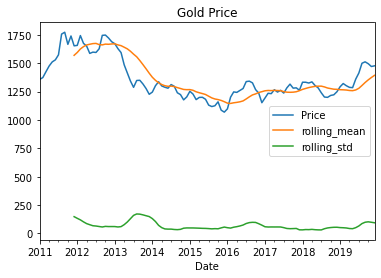

In [6]:
window_size=12
df['rolling_mean']=df.Price.rolling(window=window_size).mean()
df['rolling_std']=df.Price.rolling(window=window_size).std()
df.plot(title='Gold Price')

##Test for Stationarity

In [7]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [8]:
def adf_test(x):
    
    indices = ['Test Statistic', 'p-value',
               '# of Lags Used', '# of Observations Used']
    adf_test = adfuller(x, autolag='AIC')
    results = pd.Series(adf_test[0:4], index=indices)
    for key, value in adf_test[4].items():
        results[f'Critical Value ({key})'] = value

    return results

In [9]:
adf_test(df.Price)

Test Statistic             -1.642864
p-value                     0.460764
# of Lags Used              1.000000
# of Observations Used    106.000000
Critical Value (1%)        -3.493602
Critical Value (5%)        -2.889217
Critical Value (10%)       -2.581533
dtype: float64

In [10]:
df['Price_diff']=df['Price'].diff().dropna()

In [11]:
df.head()

,Price,rolling_mean,rolling_std,Price_diff
Date,,,,
2011-01-31,1356.40,NaN,NaN,NaN
2011-02-28,1372.73,NaN,NaN,16.33
2011-03-31,1424.01,NaN,NaN,51.28
2011-04-30,1473.81,NaN,NaN,49.80
2011-05-31,1510.44,NaN,NaN,36.63


In [12]:
adf_test(df['Price_diff'].dropna())

Test Statistic             -5.503511
p-value                     0.000002
# of Lags Used              2.000000
# of Observations Used    104.000000
Critical Value (1%)        -3.494850
Critical Value (5%)        -2.889758
Critical Value (10%)       -2.581822
dtype: float64

In [ ]:
##Test statistic less than critical value .Hence stationary

In [13]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import matplotlib.pyplot as plt
%matplotlib inline

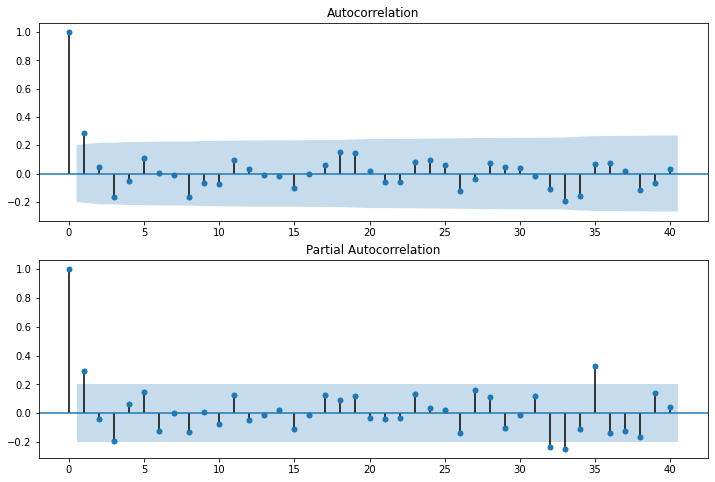

In [28]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Price_diff'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Price_diff'].iloc[13:],lags=40,ax=ax2)

In [14]:
from statsmodels.tsa.arima_model import ARIMA

In [15]:
model=ARIMA(df['Price'],order=(1,1,1))
model_fit=model.fit()

In [16]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Price   No. Observations:                  107
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -558.680
Method:                       css-mle   S.D. of innovations             44.224
Date:                Sun, 06 Sep 2020   AIC                           1125.361
Time:                        14:31:12   BIC                           1136.052
Sample:                    02-28-2011   HQIC                          1129.695
                         - 12-31-2019                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.2482      4.898      0.255      0.799      -8.351      10.848
ar.L1.D.Price    -0.7446      0.069    -10.862      0.000      -0.879      -0.610
ma.L1.D.Price     0.9999      0.095     10.561      0.000       0.814       1.185
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3430           +0.0000j            1.3430            0.5000
MA.1           -1.0001           +0.0000j            1.0001            0.5000
-----------------------------------------------------------------------------
"""

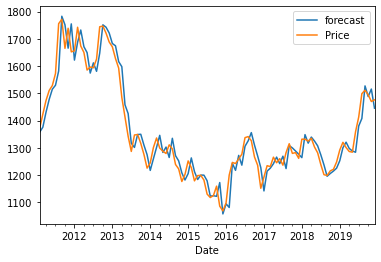

In [20]:
model_fit.plot_predict()
plt.legend()
plt.show();